In [1]:
# In[1]:
import os
import scipy.io
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from PIL import Image 
from data import load_new_data, data_convert
from keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,concatenate,Cropping2D
from keras.models import Model
import time

from tensorflow import set_random_seed



Using TensorFlow backend.
C:\Users\USER\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\anaconda3\envs\MNIST\lib\site-packag

In [2]:
pixel=28
    
if os.path.isdir('model'):
    print("model dir exist")
else:
    print("create model dir")  
    os.mkdir('model')
    
if os.path.isfile('data.mat'):
    print ('data.mat already exist')
    #data_convert (new_astype='uint8', new_size=pixel)
else:
    #data_convert (new_astype='uint8', new_size=pixel)
    data_convert (new_size=pixel)


model dir exist
data.mat already exist



-----------------check_mat------------------
data keys : dict_keys(['__header__', '__version__', '__globals__', 'train_data', 'train_label', 'test_data', 'test_label'])
train_data shape : (55000, 28, 28)
img pixel type : <class 'numpy.float32'>
check_mat train label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


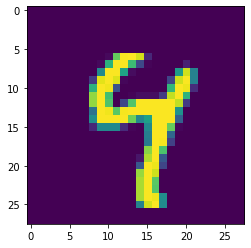

train_data.shape: (55000, 28, 28)
train_label.shape: (55000, 10)
test_data.shape: (10000, 28, 28)
test_label.shape: (10000, 10)
------------------------------------
train_data.shape: (55000, 28, 28, 1)
train_label.shape: (55000, 10)
test_data.shape: (10000, 28, 28, 1)
test_label.shape: (10000, 10)


In [3]:
train_data,train_label,test_data,test_label=load_new_data(True) # load data from 'data.mat

print ("train_data.shape:",train_data.shape)
print ("train_label.shape:",train_label.shape)
print ("test_data.shape:",test_data.shape)
print ("test_label.shape:",test_label.shape)

train_data=train_data.reshape(train_data.shape[0],pixel,pixel,1) # 三維 to 四維
test_data=test_data.reshape(test_data.shape[0],pixel,pixel,1)

print ("------------------------------------")
print ("train_data.shape:",train_data.shape)
print ("train_label.shape:",train_label.shape)
print ("test_data.shape:",test_data.shape)
print ("test_label.shape:",test_label.shape)

In [27]:
BATCH_SIZE = 256 #change there
NUM_EPOCHS = 30
TRAIN_DATA = 0.5
VAL = 0.2

TRAIN_DATA=int (1/TRAIN_DATA)
train_data = train_data [::TRAIN_DATA]
train_label = train_label [::TRAIN_DATA]
print ("train_data.shape:",train_data.shape)
print ("train_label.shape:",train_label.shape)

'''
BATCH_SIZE = 256 #change there
NUM_EPOCHS = 35
TRAIN_DATA = 1 
VAL = 0.2

TRAIN_DATA=int (1/TRAIN_DATA)
train_data = train_data [::TRAIN_DATA]
train_label = train_label [::TRAIN_DATA]
print ("train_data.shape:",train_data.shape)
print ("train_label.shape:",train_label.shape)
'''

train_data.shape: (3438, 28, 28, 1)
train_label.shape: (3438, 10)


'\nBATCH_SIZE = 256 #change there\nNUM_EPOCHS = 35\nTRAIN_DATA = 1 \nVAL = 0.2\n\nTRAIN_DATA=int (1/TRAIN_DATA)\ntrain_data = train_data [::TRAIN_DATA]\ntrain_label = train_label [::TRAIN_DATA]\nprint ("train_data.shape:",train_data.shape)\nprint ("train_label.shape:",train_label.shape)\n'

In [28]:
def model_NN(input_shape):
    X_input = Input(input_shape)
    W1 = Flatten()(X_input)
#--------------------------------D1--------------------------------------------    
    D1 = Dense(512, activation='relu', name='fc1')(W1)   # Hidden layer
    #W1 = Dropout(0.5)(W1) 
#--------------------------------O1--------------------------------------------    
    O1 = Dense(10, activation='softmax', name='out')(D1)    
    
    model_NN = Model(inputs = X_input, outputs = O1 ,name='NN') # spec. input output name
    return model_NN

In [29]:
#training setup
complete_time=time.strftime("%Y_%m_%d %H_%M_%S", time.localtime()) # Record time info.
from keras.callbacks import ModelCheckpoint
if VAL !=0:
    # Training Tips: save best weights during training 
    checkpoint = ModelCheckpoint("model/Best_NN_weights_{epoch:02d}_{val_loss:.2f}.h5", 
                                 monitor='val_loss', verbose=0,save_best_only=True, mode='auto', period=1)
    
NN=model_NN((pixel,pixel,1))

NN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(NN.summary()) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 512)               401920    
_________________________________________________________________
out (Dense)                  (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
#training

if VAL !=0:
    NN_train_history=NN.fit(x=train_data,y={"out":train_label},validation_split=VAL, epochs=NUM_EPOCHS, 
                            batch_size=BATCH_SIZE,verbose=1, callbacks=[checkpoint])
else:
    NN_train_history=NN.fit(x=train_data,y={"out":train_label},validation_split=VAL, epochs=NUM_EPOCHS, 
                            batch_size=BATCH_SIZE,verbose=1)

''' 
NN_train_history=NN.fit(x=train_data,y={"out":train_label},validation_split=VAL, epochs=NUM_EPOCHS,
                       batch_size=BATCH_SIZE,verbose=1, callbacks=[checkpoint])    
'''    

complete_time=time.strftime("%Y_%m_%d %H_%M_%S", time.localtime()) 

Train on 2750 samples, validate on 688 samples
Epoch 1/30
2750/2750 [==============================] - 2s 824us/step - loss: 1.5079 - acc: 0.6222 - val_loss: 0.8334 - val_acc: 0.7951
Epoch 2/30
2750/2750 [==============================] - 0s 170us/step - loss: 0.6279 - acc: 0.8335 - val_loss: 0.5272 - val_acc: 0.8401
Epoch 3/30
2750/2750 [==============================] - 1s 182us/step - loss: 0.4419 - acc: 0.8811 - val_loss: 0.4598 - val_acc: 0.8576
Epoch 4/30
2750/2750 [==============================] - 1s 195us/step - loss: 0.3601 - acc: 0.9051 - val_loss: 0.4249 - val_acc: 0.8648
Epoch 5/30
2750/2750 [==============================] - 1s 214us/step - loss: 0.3035 - acc: 0.9218 - val_loss: 0.3987 - val_acc: 0.8765
Epoch 6/30
2750/2750 [==============================] - 1s 189us/step - loss: 0.2670 - acc: 0.9320 - val_loss: 0.3907 - val_acc: 0.8779
Epoch 7/30
2750/2750 [==============================] - 1s 195us/step - loss: 0.2352 - acc: 0.9404 - val_loss: 0.3734 - val_acc: 0.8808
E

In [31]:

#save_weights
NN.save('NN_'+str(complete_time)+'.h5')

# In[6]:  score
# evaluate test data
NN_scores=NN.evaluate(test_data, {"out":test_label}, verbose=1)  
print('Test loss : ',' {:.5f}'.format(NN_scores[0]),' Test accuracy :',' {:.5f}'.format(NN_scores[1]))

10000/10000 [==============================] - 2s 183us/step
Test loss :   0.28968  Test accuracy :  0.91630


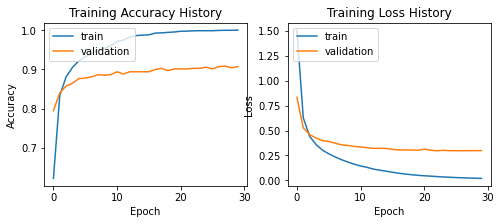

In [32]:
##plot
import matplotlib.pyplot as plt

def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(8, 3)
    plt.subplot(121)
    plt.plot(train_history.history["acc"])
    plt.plot(train_history.history["val_acc"])
    plt.title("Training Accuracy History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(train_history.history["loss"])
    plt.plot(train_history.history["val_loss"])
    plt.title("Training Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
def show_train_history_NVAL(train_history):
    fig=plt.gcf()
    fig.set_size_inches(8, 3)
    plt.subplot(121)
    plt.plot(train_history.history["acc"])
    plt.title("Training Accuracy History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train"], loc="upper left")
    plt.subplot(122)
    plt.plot(train_history.history["loss"])
    plt.title("Training Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train"], loc="upper left")
    plt.show()
    
if VAL !=0: show_train_history(NN_train_history) 
else: show_train_history_NVAL(NN_train_history) 

In [33]:
##info
print(NN.summary()) 
NN_weights = np.array(NN.get_weights(),dtype=object)
print('weights shape :',NN_weights.shape)
for i in range (0,NN_weights.shape[0],2):
    print('weights 0 shape :',NN_weights[i].shape)
    print('bias 0 shape :',NN_weights[i+1].shape)  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 512)               401920    
_________________________________________________________________
out (Dense)                  (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None
weights shape : (4,)
weights 0 shape : (784, 512)
bias 0 shape : (512,)
weights 0 shape : (512, 10)
bias 0 shape : (10,)
